## gradient
In TensorFlow, gradients are calculated to understand how changing input values or model parameters (like weights and biases) affects the output. Gradients are a key part of the backpropagation process used in training neural networks. TensorFlow makes gradient calculation simple using the tf.GradientTape context.

How Gradient is Calculated
1. Define the Context:
- Use tf.GradientTape to record operations.
- TensorFlow tracks computations within this context.

2. Compute Loss: Define a loss function (e.g., mean squared error, cross-entropy).

3. Calculate Gradients: Use the gradient() method of the tape to compute the derivatives of the loss with respect to the inputs or model parameters.

## Why gradients
1. Training Neural Networks:
- Gradients help update model parameters during backpropagation using optimization algorithms like Gradient Descent. Example: Adjusting weights to minimize the loss function.
2. Understanding Sensitivity: Gradients show how sensitive a model's output is to changes in inputs or parameters.
3. Custom Training Loops: Gradients enable advanced users to build custom training workflows.
4. Optimization: Gradients are essential for solving optimization problems in machine learning and beyond.

TensorFlow simplifies gradient computation and allows it to be applied to complex models, making it an essential tool for deep learning.

Example Code: Here’s a simple example:

In [1]:
import tensorflow as tf

# Define a simple function: y = x^2
x = tf.Variable(3.0)  # Define x as a trainable variable

# Use GradientTape to record operations
with tf.GradientTape() as tape:
    y = x ** 2  # Compute y based on x

# Calculate the gradient of y with respect to x
grad = tape.gradient(y, x)
print(f"The gradient of y = x^2 at x = {x.numpy()} is {grad.numpy()}")


The gradient of y = x^2 at x = 3.0 is 6.0


In [3]:
# Another example:
import tensorflow as tf

# Define a simple function: y = x^2
x = tf.Variable(3.0)  # Define x as a trainable variable

# Use GradientTape to record operations
with tf.GradientTape() as tape:
    y = 2*x + 2  # Compute y based on x

# Calculate the gradient of y with respect to x
grad = tape.gradient(y, x)
print(f"The gradient of y = x^2 at x = {x.numpy()} is {grad.numpy()}")


The gradient of y = x^2 at x = 3.0 is 2.0


## practical use of gradient
Example: Gradient Calculation in Linear Regression
We’ll compute gradients to minimize the Mean Squared Error (MSE) between predicted and actual values using a custom training loop.

Epoch 1: Loss = 44.8100, Weight = 0.4440, Bias = 0.1212
Epoch 2: Loss = 26.1335, Weight = 0.7830, Bias = 0.2133
Epoch 3: Loss = 15.2497, Weight = 1.0420, Bias = 0.2833
Epoch 4: Loss = 8.9070, Weight = 1.2397, Bias = 0.3363
Epoch 5: Loss = 5.2107, Weight = 1.3908, Bias = 0.3764
Epoch 6: Loss = 3.0565, Weight = 1.5063, Bias = 0.4066
Epoch 7: Loss = 1.8011, Weight = 1.5945, Bias = 0.4293
Epoch 8: Loss = 1.0693, Weight = 1.6619, Bias = 0.4463
Epoch 9: Loss = 0.6428, Weight = 1.7135, Bias = 0.4588
Epoch 10: Loss = 0.3941, Weight = 1.7530, Bias = 0.4680
Epoch 11: Loss = 0.2491, Weight = 1.7833, Bias = 0.4747
Epoch 12: Loss = 0.1644, Weight = 1.8065, Bias = 0.4794
Epoch 13: Loss = 0.1150, Weight = 1.8243, Bias = 0.4826
Epoch 14: Loss = 0.0861, Weight = 1.8380, Bias = 0.4847
Epoch 15: Loss = 0.0691, Weight = 1.8486, Bias = 0.4859
Epoch 16: Loss = 0.0591, Weight = 1.8567, Bias = 0.4865
Epoch 17: Loss = 0.0532, Weight = 1.8630, Bias = 0.4866
Epoch 18: Loss = 0.0496, Weight = 1.8680, Bias = 0.486

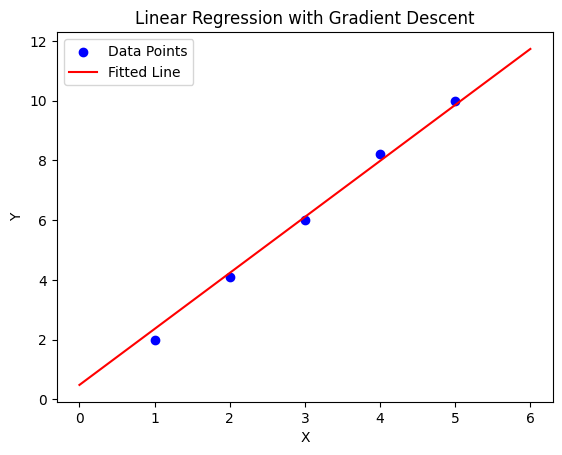

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Define a simple dataset (X, Y)
X = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])  # Features
Y = tf.constant([2.0, 4.1, 6.0, 8.2, 10.0])  # Labels (slightly noisy)

# Step 2: Define model parameters (weights and bias)
weight = tf.Variable(0.0)  # Initial weight
bias = tf.Variable(0.0)    # Initial bias

# Step 3: Define the linear model
def linear_model(x):
    return weight * x + bias

# Step 4: Define the loss function (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return tf.reduce_mean((y_true - y_pred) ** 2)

# Step 5: Training loop
learning_rate = 0.01 # TODO: different values produces types of curves
loss_values = []  # Store loss for each epoch
for epoch in range(20):  # Train for 20 epochs
    with tf.GradientTape() as tape:
        # Compute predictions and loss
        predictions = linear_model(X)
        loss = compute_loss(Y, predictions)
    
    # Compute gradients of the loss w.r.t. parameters
    gradients = tape.gradient(loss, [weight, bias])
    
    # Update parameters using the gradients
    weight.assign_sub(learning_rate * gradients[0])  # weight = weight - learning_rate * grad[0]
    bias.assign_sub(learning_rate * gradients[1])    # bias = bias - learning_rate * grad[1]
    
    # Save the loss value for plotting
    loss_values.append(loss.numpy())
    
    # Print progress
    print(f"Epoch {epoch + 1}: Loss = {loss.numpy():.4f}, Weight = {weight.numpy():.4f}, Bias = {bias.numpy():.4f}")

# Final model parameters
print(f"\nTrained Model: y = {weight.numpy():.4f}x + {bias.numpy():.4f}")

# Step 6: Plot the results
# Original points
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Data Points')

# Fitted line
x_vals = tf.linspace(0.0, 6.0, 100)  # Generate x values for the line
y_vals = linear_model(x_vals)  # Predict y values using the trained model
plt.plot(x_vals, y_vals, color='red', label='Fitted Line')

# Titles and legend
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()
